### Results

These results came from cacti, and were reformatted into a json.

Each row corresponds to a configuration, in the format `<LINE SIZE>_<# ASSOC>_<TECH NODE>`, in the order

| Order of rows |
|----------|
| 64_4_22  |
| 64_2_22  |
|  64_1_22 |
| 128_4_22 |
| 128_2_22 |
| 128_1_22 |
| 256_4_22 |
| 256_2_22 |
| 256_1_22 |

In [1]:
old_results = {
    "access_time": [
        0.453606,
        0.256185,
        0.227315,
        0.453606,
        0.256185,
        0.227315,
        0.453606,
        0.256185,
        0.227315
    ],
    "cycle_time": [
        1.37766,
        0.465586,
        0.245104,
        1.37766,
        0.465586,
        0.245104,
        1.37766,
        0.465586,
        0.245104
    ],
    "read_energy": [
        0.0338659,
        0.0188471,
        0.0116972,
        0.0337192,
        0.0187037,
        0.0115588,
        0.0336575,
        0.0186437,
        0.0115012
    ],
    "write_energy": [
        0.0333791,
        0.0242715,
        0.0266358,
        0.0327246,
        0.0239426,
        0.0264677,
        0.032409,
        0.0237898,
        0.0263953
    ],
    "leakage_power": [
        11.1161,
        10.8994,
        11.4094,
        10.704,
        10.4967,
        11.0209,
        10.4973,
        10.2948,
        10.8261
    ],
    "cache_area": [
        0.058555582988,
        0.044355183140000004,
        0.040497171945,
        0.058555281512000006,
        0.04436204853,
        0.04052622315999999,
        0.058551362324,
        0.04436681227000001,
        0.04055904438
    ]
}

In [9]:
results = {
    "access_time": [
        0.256987,
        0.227732,
        0.227315,
        0.256987,
        0.227732,
        0.227315,
        0.256987,
        0.227732,
        0.227315,
        0.256987,
        0.227732,
        0.227315
    ],
    "cycle_time": [
        0.465586,
        0.245104,
        0.245104,
        0.465586,
        0.245104,
        0.245104,
        0.465586,
        0.245104,
        0.245104,
        0.465586,
        0.245104,
        0.245104
    ],
    "read_energy": [
        0.0129229,
        0.0088955,
        0.00859638,
        0.0126746,
        0.00865371,
        0.00836449,
        0.0125279,
        0.0085103,
        0.00822602,
        0.0124662,
        0.00845025,
        0.00816844
    ],
    "write_energy": [
        0.0151788,
        0.014938,
        0.0141684,
        0.0139149,
        0.0143253,
        0.0138771,
        0.0132604,
        0.0139964,
        0.013709,
        0.0129448,
        0.0138436,
        0.0136366
    ],
    "leakage_power": [
        11.611,
        12.1586,
        12.0701,
        10.788,
        11.3546,
        11.2945,
        10.3759,
        10.9519,
        10.906,
        10.1692,
        10.7499,
        10.7111
    ],
    "cache_area": [
        0.036268929774,
        0.036063492052,
        0.035740630838,
        0.036278071454,
        0.036085470259999995,
        0.035772552432,
        0.036277728641,
        0.036095085725999995,
        0.035798011372000005,
        0.036273272072,
        0.036101757681999996,
        0.035826995396000004
    ]
}

### plot

plot the heatmaps with matplotlib

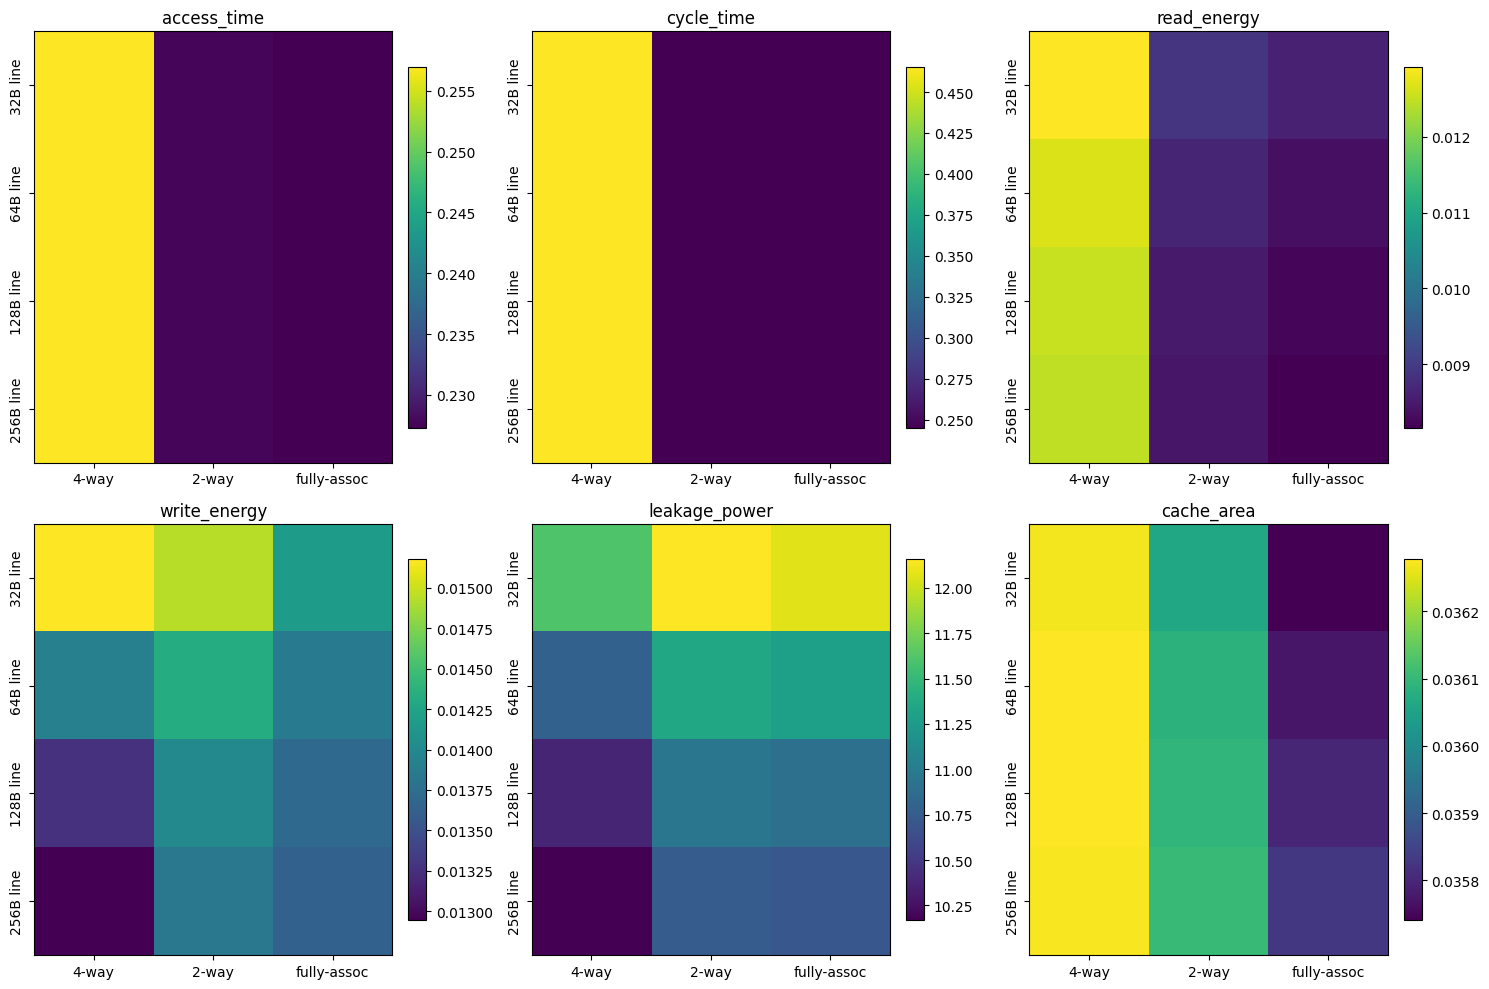

In [10]:
import matplotlib.pyplot as plt
import numpy as np

data_list = []
data_list.append(np.array(results['access_time']).reshape(4,3))
data_list.append(np.array(results['cycle_time']).reshape(4,3))
data_list.append(np.array(results['read_energy']).reshape(4,3))
data_list.append(np.array(results['write_energy']).reshape(4,3))
data_list.append(np.array(results['leakage_power']).reshape(4,3))
data_list.append(np.array(results['cache_area']).reshape(4,3))

titles = [
    "access_time",
    "cycle_time",
    "read_energy",
    "write_energy",
    "leakage_power",
    "cache_area"
]

fig, axs = plt.subplots(2, 3, figsize=(15,10))

axs = axs.flatten()

custom_row_labels = ["32B line", "64B line", "128B line", "256B line"]
custom_col_labels = ['4-way', '2-way', 'fully-assoc']

for i, (data, title, ax) in enumerate(zip(data_list, titles, axs)):
    im = ax.imshow(data, cmap='viridis', aspect='auto')

    ax.set_title(title)

    ax.set_xticks(np.arange(3))
    ax.set_xticklabels(custom_col_labels, fontsize=10)

    ax.set_yticks(np.arange(4))
    ax.set_yticklabels(custom_row_labels, fontsize=10, rotation=90, va='center')

    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

fig.tight_layout()
plt.savefig('heatmaps.png')
# plt.show()